In [1]:
import numpy as np
import pandas as pd
#from nltk.classify import NaiveBayesClassifier
#from nltk.corpus import subjectivity
#from nltk.sentiment import SentimentAnalyzer
#from nltk.sentiment.util import *


In [2]:
df_stocks = pd.read_pickle('/home/shan/Project_Mtech/stock_market_pre/Data/Pickled_data.pkl')
print(df_stocks.info())
df_stocks.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3653 entries, 2007-01-01 to 2016-12-31
Freq: D
Data columns (total 3 columns):
close        3653 non-null float64
adj close    3653 non-null float64
articles     3653 non-null object
dtypes: float64(2), object(1)
memory usage: 114.2+ KB
None


,close,adj close,articles
2007-01-01,12469.971875,12469.971875,. What Sticks from '06. Somalia Orders Islamis...
2007-01-02,12472.245703,12472.245703,. Heart Health: Vitamin Does Not Prevent Death...
2007-01-03,12474.519531,12474.519531,. Google Answer to Filling Jobs Is an Algorith...
2007-01-04,12480.690430,12480.690430,. Helping Make the Shift From Combat to Commer...
2007-01-05,12398.009766,12398.009766,. Rise in Ethanol Raises Concerns About Corn a...


In [3]:
df_stocks['prices'] = df_stocks['adj close'].apply(np.int64)
print(df_stocks.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3653 entries, 2007-01-01 to 2016-12-31
Freq: D
Data columns (total 4 columns):
close        3653 non-null float64
adj close    3653 non-null float64
articles     3653 non-null object
prices       3653 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 142.7+ KB
None


In [4]:
# selecting the prices and articles
df_stocks = df_stocks[['prices', 'articles']]
df_stocks['articles'] = df_stocks['articles'].map(lambda x: x.lstrip('.-'))
#print(df_stocks.head())


In [5]:
df = df_stocks[['prices']].copy()
#print(df.head())
df["compound"] = ''
df["neg"] = ''
df["neu"] = ''
df["pos"] = ''

df_stocks.articles.dtype
T_df_stocks=df_stocks.T
T_df_stocks
df.head(5)

,prices,compound,neg,neu,pos
2007-01-01,12469,,,,
2007-01-02,12472,,,,
2007-01-03,12474,,,,
2007-01-04,12480,,,,
2007-01-05,12398,,,,


In [6]:
#Now starts score prediction for given sentence.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#import nltk
#nltk.download('vader_lexicon')
import unicodedata
saf = SentimentIntensityAnalyzer()   #df_stocks.T provides the transpose of data
T_df_stocks=df_stocks.T
#print(T_df_stocks.head())

for date, row in df_stocks.T.iteritems():
    try:
        sentence = unicodedata.normalize('NFKD', df_stocks.loc[date, 'articles']).encode('ascii','ignore')
        #print(sentence)
        ss = saf.polarity_scores(sentence)
        df.set_value(date, 'compound', ss['compound'])
        df.set_value(date, 'neg', ss['neg'])
        df.set_value(date, 'neu', ss['neu'])
        df.set_value(date, 'pos', ss['pos'])
    except TypeError:
        #print (df_stocks.loc[date, 'articles'].head())
        date


/home/shan/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
/home/shan/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
/home/shan/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/shan/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [7]:
df.head()


,prices,compound,neg,neu,pos
2007-01-01,12469,-0.9814,0.159,0.749,0.093
2007-01-02,12472,-0.8335,0.116,0.785,0.099
2007-01-03,12474,-0.9993,0.198,0.734,0.067
2007-01-04,12480,-0.9982,0.131,0.806,0.062
2007-01-05,12398,-0.9901,0.124,0.794,0.082


In [8]:
#sentence = 'paris shootout police officer suspected guman dead'
#sentence ='ohh no icici deal '
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
#import unicodedata
#sid = SentimentIntensityAnalyzer()
#ss = sid.polarity_scores(sentence)
#ss
df.head()

,prices,compound,neg,neu,pos
2007-01-01,12469,-0.9814,0.159,0.749,0.093
2007-01-02,12472,-0.8335,0.116,0.785,0.099
2007-01-03,12474,-0.9993,0.198,0.734,0.067
2007-01-04,12480,-0.9982,0.131,0.806,0.062
2007-01-05,12398,-0.9901,0.124,0.794,0.082


In [9]:
train_start_date = '2007-01-01'
train_end_date = '2014-12-31'
test_start_date = '2015-01-01'
test_end_date = '2016-12-31'
train = df.loc[train_start_date : train_end_date]
test = df.loc[test_start_date:test_end_date]
print(train.head())
print(test.head())

            prices compound    neg    neu    pos
2007-01-01   12469  -0.9814  0.159  0.749  0.093
2007-01-02   12472  -0.8335  0.116  0.785  0.099
2007-01-03   12474  -0.9993  0.198  0.734  0.067
2007-01-04   12480  -0.9982  0.131  0.806  0.062
2007-01-05   12398  -0.9901  0.124  0.794  0.082
            prices compound    neg    neu    pos
2015-01-01   17828  -0.8744  0.134  0.737  0.129
2015-01-02   17832  -0.9667  0.145   0.76  0.095
2015-01-03   17722  -0.9621  0.125  0.788  0.088
2015-01-04   17612  -0.9971   0.22  0.716  0.064
2015-01-05   17501  -0.9905  0.156  0.767  0.077


In [10]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    #sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)
numpy_df_train

array([[0.159, 0.093],
       [0.116, 0.099],
       [0.198, 0.067],
       ...,
       [0.173, 0.082],
       [0.16 , 0.14 ],
       [0.205, 0.134]])

In [11]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    #sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)
numpy_df_test

array([[0.134, 0.129],
       [0.145, 0.095],
       [0.125, 0.088],
       ...,
       [0.138, 0.103],
       [0.162, 0.108],
       [0.181, 0.16 ]])

In [12]:
y_train = pd.DataFrame(train['prices'])
y_test = pd.DataFrame(test['prices'])
print(y_train)
print(y_test)

            prices
2007-01-01   12469
2007-01-02   12472
2007-01-03   12474
2007-01-04   12480
2007-01-05   12398
2007-01-06   12406
2007-01-07   12414
2007-01-08   12423
2007-01-09   12416
2007-01-10   12442
2007-01-11   12514
2007-01-12   12556
2007-01-13   12562
2007-01-14   12569
2007-01-15   12575
2007-01-16   12582
2007-01-17   12577
2007-01-18   12567
2007-01-19   12565
2007-01-20   12536
2007-01-21   12506
2007-01-22   12477
2007-01-23   12533
2007-01-24   12621
2007-01-25   12502
2007-01-26   12487
2007-01-27   12488
2007-01-28   12489
2007-01-29   12490
2007-01-30   12523
...            ...
2014-12-02   17879
2014-12-03   17912
2014-12-04   17900
2014-12-05   17958
2014-12-06   17923
2014-12-07   17887
2014-12-08   17852
2014-12-09   17801
2014-12-10   17533
2014-12-11   17596
2014-12-12   17280
2014-12-13   17247
2014-12-14   17214
2014-12-15   17180
2014-12-16   17068
2014-12-17   17356
2014-12-18   17778
2014-12-19   17804
2014-12-20   17856
2014-12-21   17907
2014-12-22  

In [13]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)
print (rf.feature_importances_)

/home/shan/anaconda3/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/shan/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


[0.52923505 0.47076495]


In [14]:
from treeinterpreter import treeinterpreter as ti
prediction, bias, contributions = ti.predict(rf, numpy_df_test)


In [15]:
prediction

array([11450.9       ,  9632.8       , 14904.8       , 14542.9       ,
       11713.9       , 11027.8       , 12014.3       , 14146.        ,
       13707.6       , 10713.6       , 12581.8       , 11846.5       ,
       13784.8       , 11757.        , 12183.64333333, 13235.8       ,
       13619.05      , 14176.85      , 15470.7       , 15601.06666667,
       11559.7       , 12320.2       , 10524.9       , 13020.7       ,
       16531.35      , 12890.1       , 11028.8       , 12633.33333333,
       12272.1       , 14833.7434127 , 14482.2       , 12703.1       ,
       10365.8       , 10963.5       , 11128.        , 12752.2       ,
       11854.51666667, 12463.6       , 13248.6       , 14707.        ,
       11911.26666667, 13091.56666667, 13826.4       , 11818.18666667,
       15120.9       , 14331.9       , 13159.53666667, 10243.2       ,
       11907.26666667, 11708.17333333, 14430.10166667, 14733.83333333,
       13185.4       , 10946.58333333, 14118.2       , 11758.83      ,
      

In [16]:
contributions

array([[-1186.50015924,    69.6564563 ],
       [ -883.09794552, -2051.84575742],
       [  810.14583423,  1526.91046283],
       ...,
       [  176.29179495, -1867.6354979 ],
       [ 1660.25205592,  -275.79575886],
       [ -301.07449165,   504.7307887 ]])

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

idx = pd.date_range(test_start_date, test_end_date)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])

predictions_df
price_comp=pd.merge(predictions_df,y_test,how='inner',on=idx)
price_comp

,key_0,prices_x,prices_y
0,2015-01-01,11450.900000,17828
1,2015-01-02,9632.800000,17832
2,2015-01-03,14904.800000,17722
3,2015-01-04,14542.900000,17612
4,2015-01-05,11713.900000,17501
5,2015-01-06,11027.800000,17371
6,2015-01-07,12014.300000,17584
7,2015-01-08,14146.000000,17907
8,2015-01-09,13707.600000,17737
9,2015-01-10,10713.600000,17705


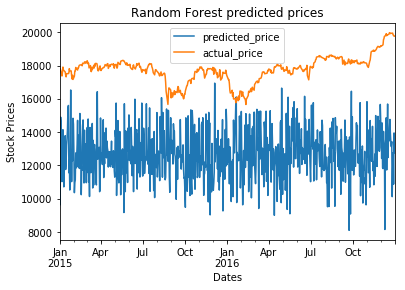

In [19]:
''''predictions_plot = predictions_df.plot()

fig = y_test.plot(ax = predictions_plot).get_figure()
fig.savefig("/home/shan/Project_Mtech/stock_market_pre/Data/random_forest_without_smoothing.png")'''

ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()
fig.savefig("/home/shan/Project_Mtech/stock_market_pre/Data/random_forest_without_smoothing.png")

In [21]:
test.head()

,prices,compound,neg,neu,pos
2015-01-01,17828,-0.8744,0.134,0.737,0.129
2015-01-02,17832,-0.9667,0.145,0.76,0.095
2015-01-03,17722,-0.9621,0.125,0.788,0.088
2015-01-04,17612,-0.9971,0.22,0.716,0.064
2015-01-05,17501,-0.9905,0.156,0.767,0.077


In [23]:
from datetime import datetime, timedelta

temp_date = test_start_date
average_last_5_days_test = 0
total_days = 10
for i in range(total_days):
    average_last_5_days_test += test.loc[temp_date, 'prices']
    # Converting string to date time
    temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Reducing one day from date time
    difference = temp_date + timedelta(days=1)
    # Converting again date time to string
    temp_date = difference.strftime('%Y-%m-%d')
    #print temp_date
average_last_5_days_test = average_last_5_days_test / total_days
print average_last_5_days_test

temp_date = test_start_date
average_upcoming_5_days_predicted = 0
for i in range(total_days):
    average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
    # Converting string to date time
    temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Adding one day from date time
    difference = temp_date + timedelta(days=1)
    # Converting again date time to string
    temp_date = difference.strftime('%Y-%m-%d')
    print temp_date
average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
print average_upcoming_5_days_predicted
#average train.loc['2013-12-31', 'prices'] - advpredictions_df.loc['2014-01-01', 'prices']
difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
difference_test_predicted_prices

17679
2015-01-02
2015-01-03
2015-01-04
2015-01-05
2015-01-06
2015-01-07
2015-01-08
2015-01-09
2015-01-10
2015-01-11
12385.460000000003


5293.539999999997

In [24]:
predictions_df

,prices
2015-01-01,11450.900000
2015-01-02,9632.800000
2015-01-03,14904.800000
2015-01-04,14542.900000
2015-01-05,11713.900000
2015-01-06,11027.800000
2015-01-07,12014.300000
2015-01-08,14146.000000
2015-01-09,13707.600000
2015-01-10,10713.600000


In [25]:
# Adding 6177 to all the advpredictions_df price values
predictions_df['prices'] = predictions_df['prices'] + difference_test_predicted_prices
predictions_df

,prices
2015-01-01,16744.440000
2015-01-02,14926.340000
2015-01-03,20198.340000
2015-01-04,19836.440000
2015-01-05,17007.440000
2015-01-06,16321.340000
2015-01-07,17307.840000
2015-01-08,19439.540000
2015-01-09,19001.140000
2015-01-10,16007.140000


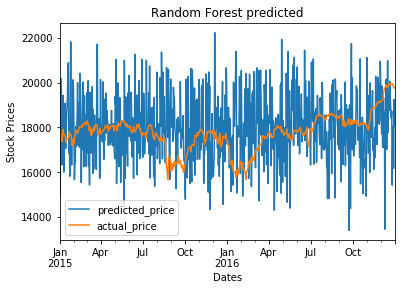

In [28]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()
#fig.savefig("graphs/random forest with aligning.png")
